<a href="https://colab.research.google.com/github/madsouza10/Firmware/blob/master/RegressaoLinear_2_Curos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [2]:
X = np.array( [[18], [23], [28], [33], [38], [43], [48], [53], [58], [63] ])
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [3]:
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [0]:
from sklearn.preprocessing import StandardScaler
Scaler_X =  StandardScaler()
X = Scaler_X.fit_transform(X)

In [5]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
Scaler_y = StandardScaler()
y = Scaler_y.fit_transform(y)
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

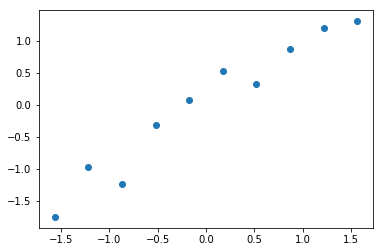

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [0]:
#formula de regressão linear simple
#y =b0 + b1 * x

In [9]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [0]:
import tensorflow as tf

In [0]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [0]:
erro = tf.losses.mean_squared_error(y, (b0 + b1*X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  #print(sess.run(b0))
  #print(sess.run(b1))
  for i in range(1000):
     sess.run(treinamento)
  b0_final, b1_final = sess.run([b0, b1])

In [0]:
b

In [24]:
b0_final

0.07293497

In [25]:
b1_final

0.9359134

In [26]:
previsoes = b0_final + b1_final*X
previsoes

array([[-1.3933595 ],
       [-1.06751629],
       [-0.74167307],
       [-0.41582985],
       [-0.08998664],
       [ 0.23585658],
       [ 0.56169979],
       [ 0.88754301],
       [ 1.21338623],
       [ 1.53922944]])

In [27]:
type(previsoes)

numpy.ndarray

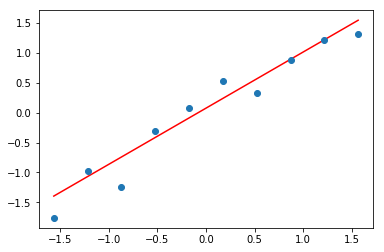

In [31]:
plt.plot(X, previsoes, color = 'red')
plt.plot(X,y,'o')

In [36]:
Scaler_X.transform([[40]])

array([[-0.03481553]])

In [0]:
previsao= Scaler_y.inverse_transform(b0_final + b1_final*Scaler_X.transform([[40]]))

In [43]:
previsao

array([[1475.15950152]])

In [46]:
y1 = Scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [47]:
previsoes1 = Scaler_y.inverse_transform(previsoes)
previsoes1

array([[ 993.37307127],
       [1102.86998723],
       [1212.3669032 ],
       [1321.86381917],
       [1431.36073513],
       [1540.8576511 ],
       [1650.35456707],
       [1759.85148303],
       [1869.348399  ],
       [1978.84531497]])

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [50]:
mae

67.91875458994167

In [51]:
mse

7153.9129941765395